INSTALL AND IMPORT LIBRARIES

In [24]:
import sys
import numpy as np #Linear Algebra
import pandas as pd #Data Processing
import seaborn as sns #Data Visualization
import pickle
%matplotlib inline
from sklearn.preprocessing import LabelEncoder #LabelEncoding From Sklearn
from sklearn.preprocessing import OneHotEncoder #One-Hot Encoding From Sklearn
from sklearn.model_selection import train_test_split #Split Data in Train & Test Array
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier #ML Algorithm
from sklearn.metrics import accuracy_score #Calculate Accuracy Score
import sklearn.metrics as metrics #Confusion Matrix


UPLOAD THE FILE

In [2]:
from google.colab import files
uploaded = files.upload()


Saving flightdata.csv to flightdata.csv


In [25]:
dataset = pd.read_csv('flightdata.csv')

ANALYSE THE DATASET

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [27]:
dataset.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


HANDLING MISSING VALUES

Analyze count of missing values in each column

In [28]:
dataset.isnull().sum()

,0
YEAR,0
QUARTER,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
UNIQUE_CARRIER,0
TAIL_NUM,0
FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0


Check unique values in dataset

In [29]:
dataset['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

DATA VISUALIZATION


Scatter Plot between ARR_DELAY& ARR_DEL15

<Axes: xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

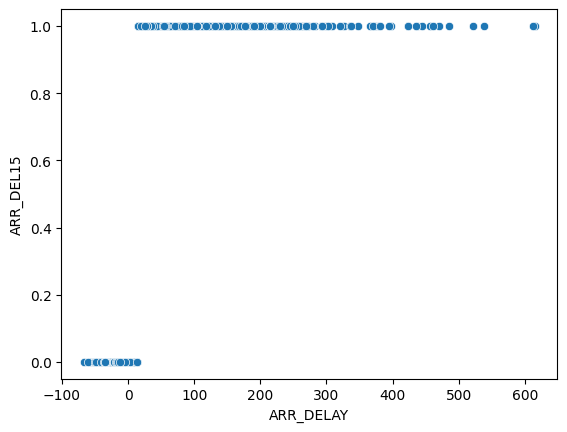

In [30]:
sns.scatterplot(x='ARR_DELAY', y='ARR_DEL15', data=dataset)


Cat Plot between ARR_DELAY& ARR_DEL15

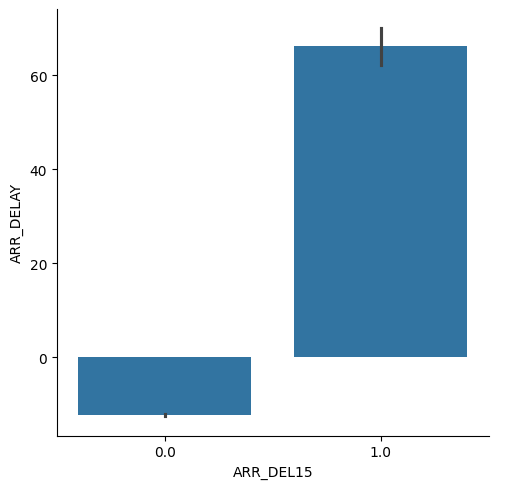

In [31]:
sns.catplot(x="ARR_DEL15", y="ARR_DELAY", kind='bar', data=dataset)


seaborn heatmap

<Axes: >

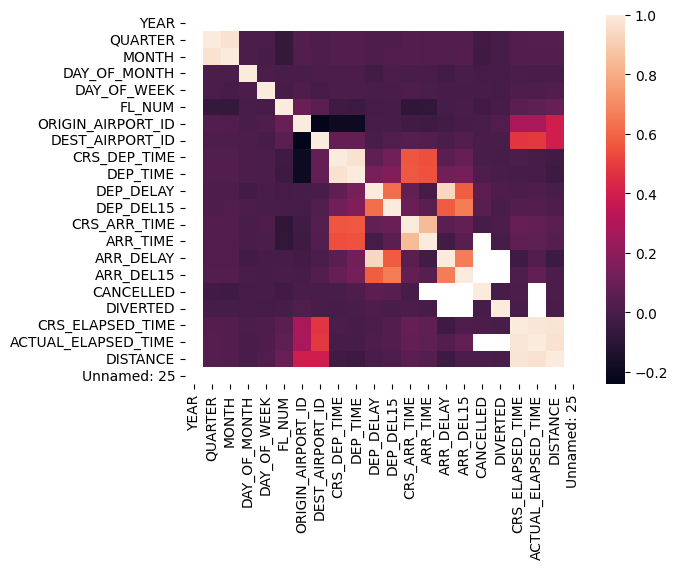

In [32]:
sns.heatmap(dataset.select_dtypes(include='number').corr())


Visualized Arrival Delay Distribution

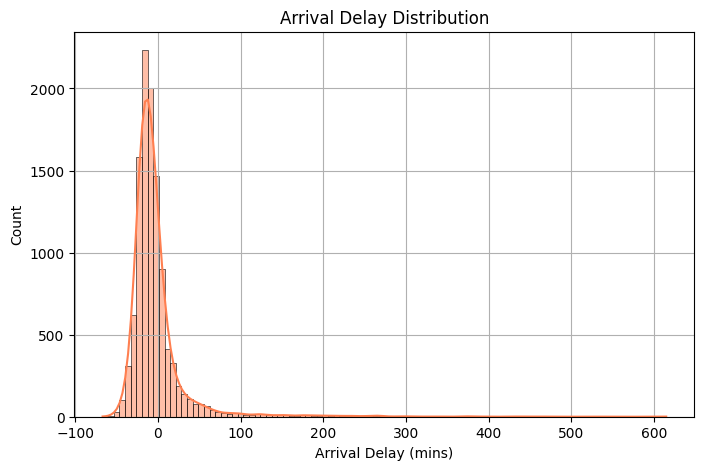

 Visualized Arrival Delay Distribution


In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(dataset['ARR_DELAY'], bins=100, kde=True, color='coral')
plt.title('Arrival Delay Distribution')
plt.xlabel('Arrival Delay (mins)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

print(" Visualized Arrival Delay Distribution")



DROPPING UNNECESSARY COLUMNS

Remove the column unnamed from the dataset.



In [34]:
dataset = dataset.drop('Unnamed: 25', axis=1)
dataset.isnull().sum()


,0
YEAR,0
QUARTER,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
UNIQUE_CARRIER,0
TAIL_NUM,0
FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0


Filter the dataset to eliminate columns that aren't relevant to a predictive model.

In [35]:
dataset = dataset[['FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'CRS_ARR_TIME', 'DEP_DEL15', 'ARR_DEL15']]
dataset.isnull().sum()


,0
FL_NUM,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
ORIGIN,0
DEST,0
CRS_ARR_TIME,0
DEP_DEL15,107
ARR_DEL15,188


Replace the missing value 0’s & 1’s

In [36]:
dataset = dataset.fillna({'ARR_DEL15': 1})
dataset = dataset.fillna({'DEP_DEL15': 0})
dataset.iloc[177:185]


,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,1.0
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,0.0,1.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,1.0


In [37]:
import math

for index, row in dataset.iterrows():
    dataset.loc[index, 'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME'] / 100)
dataset.head()


,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


Splitting the Dataset into Dependent and Independent variables

In [38]:
dt = pd.get_dummies(dataset, columns=['ORIGIN', 'DEST'])
dt.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1399,1,1,5,21,0.0,0.0,True,False,False,False,False,False,False,False,False,True
1,1476,1,1,5,14,0.0,0.0,False,True,False,False,False,False,False,False,True,False
2,1597,1,1,5,12,0.0,0.0,True,False,False,False,False,False,False,False,False,True
3,1768,1,1,5,13,0.0,0.0,False,False,False,False,True,False,False,False,True,False
4,1823,1,1,5,6,0.0,0.0,False,False,False,False,True,False,True,False,False,False


In [39]:
x = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8:9].values

LABEL ENCODING

In [40]:
from sklearn.preprocessing import LabelEncoder
dataset.columns = dataset.columns.str.strip()
le = LabelEncoder()
dataset['DEST'] = le.fit_transform(dataset['DEST'])
dataset['ORIGIN'] = le.fit_transform(dataset['ORIGIN'])

In [41]:
dataset.head(5)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


ONE HOT ENCODING

In [42]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

oh1 = OneHotEncoder()
oh2 = OneHotEncoder()

z = oh1.fit_transform(x[:, 4:5]).toarray()
t = oh2.fit_transform(x[:, 5:6]).toarray()

# Remove original columns 4 and 5
x_numeric = np.delete(x, [4, 5], axis=1)

# Concatenate new encoded columns
x = np.concatenate([x_numeric, z, t], axis=1)


In [43]:
z

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [44]:
t

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

SPLITTING THE DATASET INTO TEST AND TRAIN

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [46]:
x_test.shape

(2247, 16)

In [47]:
x_train.shape

(8984, 16)

In [48]:
y_test.shape

(2247, 1)

In [49]:
y_train.shape

(8984, 1)

MODEL BUILDING

Model Training

Build the model with the Decision Tree Classifier.

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [51]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [52]:
decisiontree = classifier.predict(x_test)

In [53]:
decisiontree

array([1., 0., 0., ..., 0., 0., 1.])

Model Testing

In [54]:
decisiontree = classifier.predict(x_test)

In [55]:
decisiontree

array([1., 0., 0., ..., 0., 0., 1.])

MODEL EVALUATION

Score of the model

In [56]:
from sklearn.metrics import accuracy_score
desacc = accuracy_score(y_test, decisiontree)

In [57]:
desacc

0.8704939919893191

SAVING THE MODEL

In [64]:
import pickle
pickle.dump(classifier, open('flight.pkl', 'wb'))